<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-January/blob/main/Ensemble%20Learning/Ensemble_Assignment_02_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 01

* read dataset from given link https://raw.githubusercontent.com/Ramanand-Yadav/DataSet/main/Bank_Personal_Loan_Modelling%20(1).csv

In [ ]:
import ?? as pd
import numpy as ??

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
bank = pd.??('??')
bank.??

In [ ]:
bank = pd.read_csv('https://raw.githubusercontent.com/Ramanand-Yadav/DataSet/main/Bank_Personal_Loan_Modelling%20(1).csv')
bank.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
bank.??

In [ ]:
bank.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

### Information on the features or attributes

The attributes can be divided accordingly :
* The variable **ID** does not add any interesting information. There is no association between a person's customer ID  and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? **This is our target variable**
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

* Age - Age of the customer
* Experience - Years of experience
* Income - Annual income in dollars
* CCAvg - Average credit card spending
* Mortage - Value of House Mortgage

Ordinal Categorical Variables are:
* Family - Family size of the customer
* Education - education level of the customer

The nominal variable is :

* ID
* Zip Code

"check for null value"

In [ ]:
bank.??.??

In [ ]:
bank.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [ ]:
bank.??.??

In [ ]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


After describing the dataset, we can observe that some of the values in the Experience Feature are negative.

###Preprocessing

In [ ]:
# Let's see how many distinct values each feature has
bank.??(?? x : len(??))

In [ ]:
# Let's see how many distinct values each feature has
bank.apply(lambda x : len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
??

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Create a new DataFrame called bank_negExp, which will hold all of the samples with negative Experience Values.
??
??

In [ ]:
bank_negExp = bank[bank['Experience']<0]
bank_negExp.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [ ]:
# the number of samples in which the Experience attribute has a negative value
??

In [ ]:
# the number of samples in which the Experience attribute has a negative value
bank_negExp.shape

(52, 14)

In [ ]:
# find the median of all non-negative Experience values
??

In [ ]:
# We'll get the median of the experience value and use it to replace the negative experience value.
bank2 = bank[bank['Experience'] > 0 ]
medVal = bank2['Experience'].median()
print(medVal)

21.0


In [ ]:
# We'll get the median of the experience value and use it to replace the negative experience value.
??

In [ ]:
# We'll get the median of the experience value and use it to replace the negative experience value.
bank['Experience'] = np.where(bank['Experience']<0, medVal, bank['Experience'])


In [ ]:
# Now we can see that the Experience Feature has no negative value.
??

In [ ]:
# Now we can see that the Experience Feature has no negative value.
bank[bank['Experience']<0]['Experience'].count()

0

In [ ]:
??

In [ ]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.338000,11.253190,0.0,11.00,21.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
??

In [ ]:
bank.shape

(5000, 14)

In [ ]:
??

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   float64
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [ ]:
??

In [ ]:
bank.apply(lambda x : len(x.unique()))

ID                   5000
Age                    45
Experience             44
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

###EDA


In [ ]:
# import seaborn and matplotlib
??
??

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
??

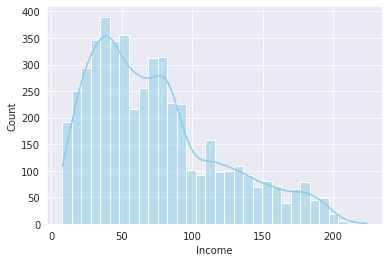

In [ ]:
sns.set_style('darkgrid')
sns.histplot(data=bank, x="Income", kde=True, color="skyblue")
plt.show()

It looks that income has skewed to the left.

* Influence of income and education on personalLoan 

In [ ]:
??

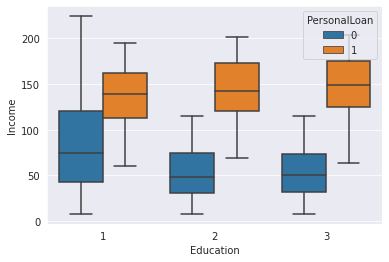

In [ ]:
sns.boxplot(x='Education', y='Income',hue = 'PersonalLoan', data = bank)
plt.show()

**Observation** : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

In [ ]:
??

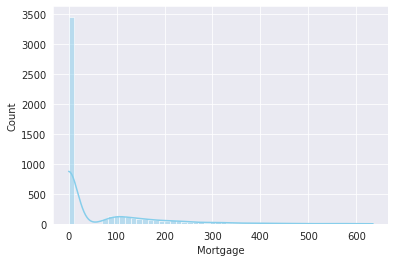

In [ ]:
sns.histplot(data = bank, x='Mortgage', kde = True, color = 'skyblue')
plt.show()

Maximum people having 0 Mortage

In [ ]:
??

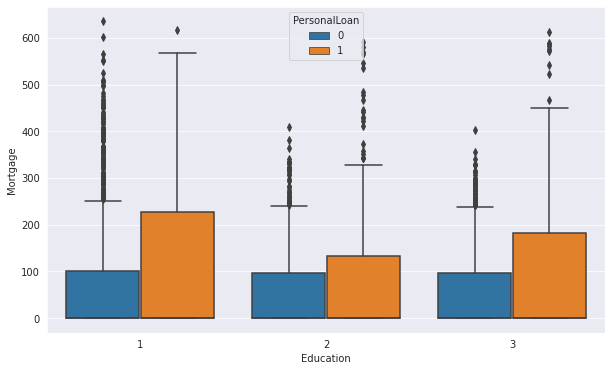

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = bank, x="Education", y="Mortgage", hue = "PersonalLoan")
plt.show()

**Inference** : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

In [ ]:
??

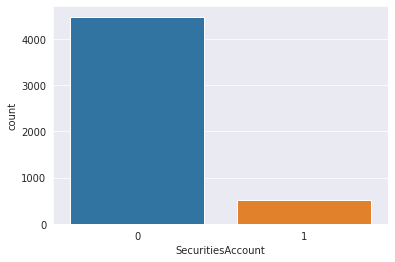

In [ ]:
sns.countplot(data = bank, x='SecuritiesAccount')
plt.show()

Majority People does not have SecuritiesAccount

In [ ]:
??

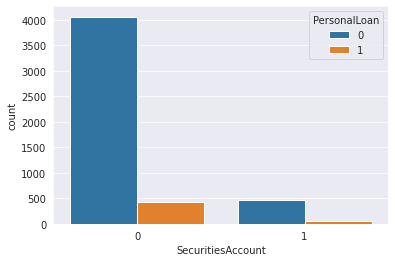

In [ ]:
sns.countplot(data=bank , x = 'SecuritiesAccount', hue = "PersonalLoan")
plt.show()

**Observation** : Majority of customers who does not have loan have securities account

In [ ]:
??

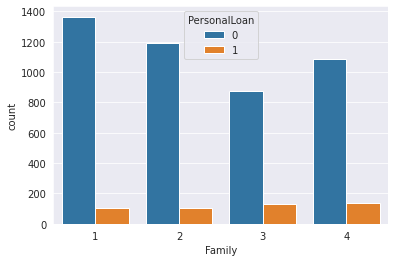

In [ ]:
sns.countplot(data = bank, x="Family", hue ="PersonalLoan")
plt.show()

**Observation**: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

In [ ]:
??

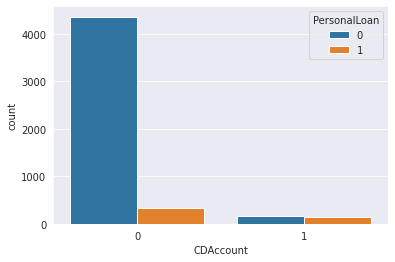

In [ ]:
sns.countplot(data = bank , x="CDAccount", hue="PersonalLoan")
plt.show()

**Observation**: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

In [ ]:
??

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


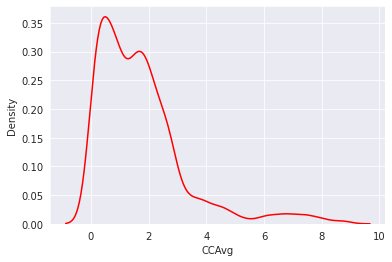

In [ ]:
sns.distplot(bank[bank['PersonalLoan']==0]["CCAvg"], kde=True, color = 'r', hist=False, )
plt.show()

In [ ]:
??

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


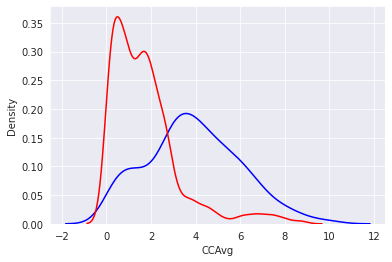

In [ ]:
sns.distplot(bank[bank['PersonalLoan']==1]["CCAvg"], kde=True, color='blue', hist=False)
sns.distplot(bank[bank['PersonalLoan']==0]["CCAvg"], kde=True, color = 'r', hist=False, )
plt.show()

In [ ]:
# When PersonalLoan values are 0 and 1, calculate the CCAvg median value and multiply it by 1000.
??

In [ ]:
print('Credit card spending of Non-Loan customers: ',bank[bank.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', bank[bank.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


**Observation**: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

In [ ]:
??

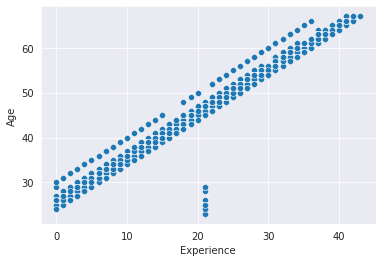

In [ ]:
sns.scatterplot(data = bank, x="Experience", y="Age")
plt.ylabel("Age")
plt.xlabel("Experience")
plt.show()

In [ ]:
??

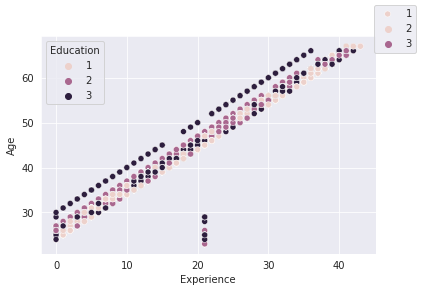

In [ ]:
fig, _ = plt.subplots()
sns.scatterplot(data = bank, x="Experience", y="Age", hue = "Education") 
fig.legend(labels = ["1", "2", "3"])
plt.ylabel("Age")
plt.xlabel("Experience")
plt.show()

**Observation** The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level.

In [ ]:
??

In [ ]:
bank.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.009386,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.975489,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009386,0.975489,1.000000,-0.049123,-0.028453,-0.045149,-0.048628,0.018289,-0.013482,-0.014314,-0.000432,0.005292,0.013422,0.008823
Income,-0.017695,-0.055269,-0.049123,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028453,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045149,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.048628,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.018289,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013482,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.014314,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [ ]:
??

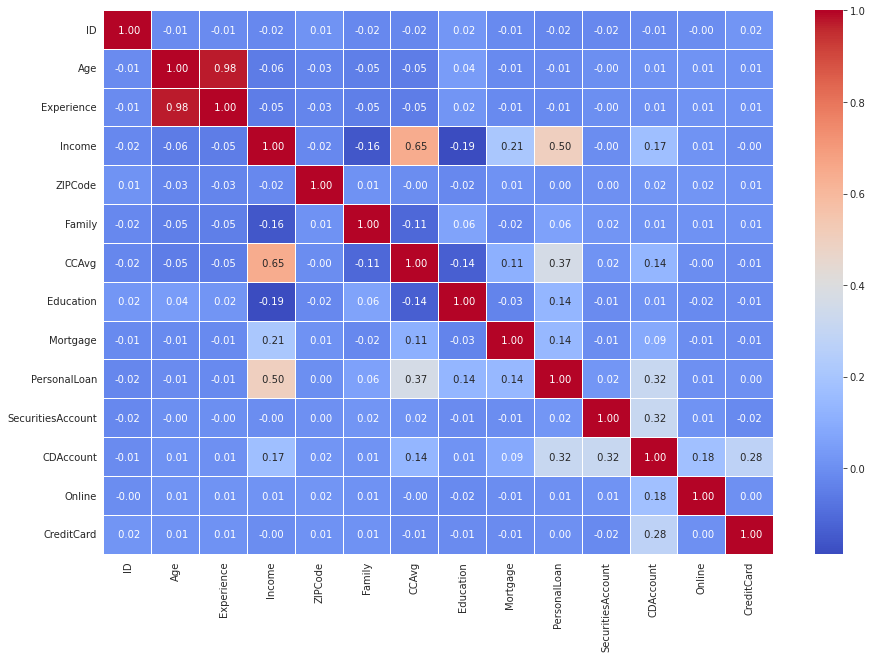

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(bank.corr(), annot= True, linewidths=0.1, fmt=' .2f', cmap='coolwarm')
plt.show()

**Observation**
* Income and CCAvg is moderately correlated. 
* Age and Experience is highly correlated

In [ ]:
bank.columns
# Numerical_cal = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']

# Categorcal_col = ['Family', 'Education', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount ', 'Online', 'CreditCard']


Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
??

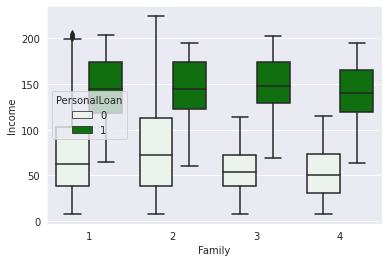

In [ ]:
sns.boxplot(data = bank, x="Family", y = "Income", hue="PersonalLoan", color='green')
plt.show()

**observation** : Looking at the above plot, families with income less than 100K are less likely to take loan,than families with high income.

* you are free to do more eda and Feature Engineering

###training and testing.

In [ ]:
# store label in the Y and Features in X variable 
??

In [ ]:
Y = bank['PersonalLoan']
X = bank.drop("PersonalLoan", axis = 1)
print(Y.shape, X.shape)

(5000,) (5000, 13)


In [ ]:
#train test split
??

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 13) (1000, 13) (4000,) (1000,)


In [ ]:
# Robust Sacling 
??

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rScale = RobustScaler()
Xtrain= rScale.fit_transform(X_train)
Xtest = rScale.transform(X_test)

###Import and Train Model 

###VotingClassifier

In [ ]:
# import DecisionTree, LogisticRegression , SVM, GaussianNB, and VotingClassifier
??

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# make objects of every model 
# make objects of votingclassifier use hard and soft voting
??

In [ ]:
dt = DecisionTreeClassifier()
lg = LogisticRegression()
sv = SVC(probability=True)
gnb = GaussianNB()
knn = KNeighborsClassifier()
models = [('dt', dt), ('lg', lg), ("sv", sv), ("gnb", gnb), ("knn", knn)]
vot = VotingClassifier(estimators = models, voting = "hard")


In [ ]:
# train your model 
??

In [ ]:
vot.fit(Xtrain, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lg', LogisticRegression()),
                             ('sv', SVC(probability=True)),
                             ('gnb', GaussianNB()),
                             ('knn', KNeighborsClassifier())])

In [ ]:
# check socre of your model 
??

In [ ]:
vot.score(Xtest, y_test)

0.971

In [ ]:
# import accuracy_score and check accuracy of individual model 
??

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
for model in (dt, lg, sv, gnb, knn):
  model.fit(Xtrain, y_train)
  y_pred = model.predict(Xtest)
  print(model.__class__.__name__, accuracy_score(y_pred, y_test))

DecisionTreeClassifier 0.988
LogisticRegression 0.952
SVC 0.978
GaussianNB 0.895
KNeighborsClassifier 0.955


###BaggingClassifier

In [ ]:
# import BaggingClassifier and KNeighborsClassifier
??

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

In [ ]:
bagging.fit(Xtrain, y_train)
bagging.score(Xtest, y_test)

0.927

####RandomClassifier

In [ ]:
# import RandomClassifier 
??

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(Xtrain, y_train)

RandomForestClassifier()

In [ ]:
rf.score(Xtest, y_test)

0.989

In [ ]:
# import RandomizedSearchCV for hyperparametertunning
??

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# set random_grid
??

In [ ]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230, 300, 350, 600, 700, 900]}

In [ ]:
# make object of RandomizedSearchCV and tune
??

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xtrain, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230, 300,
                                                         350, 600, 700, 900]},
                   random_state=42, verbose=2)

In [ ]:
# finding best parameters 
??

In [ ]:
print("best Param: " , rf_random.best_params_)
print("Random forest: " , rf_random.best_score_)
print("Best estimator:  ",  rf_random.best_estimator_)

best Param:  {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
Random forest:  0.984749373250359
Best estimator:   RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5,
                       n_estimators=350)


####Extra Trees

In [ ]:
# import extra tree and train the model 
??

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()

In [ ]:

ext.fit(Xtrain, y_train)
ext.score(Xtest, y_test)

0.986

###Boosting
* Adaboost
* GradientBoost
* Xgboost

####Adaboosting

In [ ]:
# import Adaboost and  train the model 
??

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adboost = AdaBoostClassifier(n_estimators=100, random_state = 0)

In [ ]:
adboost.fit(Xtrain, y_train)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
adboost.score(Xtest, y_test)

0.974

####GradientBoosting

In [ ]:
# import GradientBoostingClassifier and Train the model 
??

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)

In [ ]:
gb.fit(Xtrain, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=1, random_state=0)

In [ ]:
gb.score(Xtest, y_test)

0.977

####Xgboost

In [ ]:
# import Xgboost 
??

In [ ]:
import xgboost
xgclf = xgboost.XGBClassifier()

In [ ]:
# train the model 
??

In [ ]:
xgclf.fit(Xtrain, y_train)

XGBClassifier()

In [ ]:
xgclf.score(Xtest, y_test)

0.989

In [ ]:
# print all default parameter of xgboost
??

In [ ]:
#here all the default parameter of xgboost
xgclf.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 1,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
# import RandomizedSearchCV for hyperparameter tuning
??

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# use these params

In [ ]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
rs_model=RandomizedSearchCV(xgclf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
#model fitting
rs_model.fit(Xtrain,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
# print best estimator
??

In [ ]:
rs_model.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=8,
              min_child_weight=5)

Use these parameters to improve your score.

###StackingClassifier

In [ ]:
# import RandomForestClassifier , StackingClassifier, LogisticRegression, GaussianNB, KNeighbors
??

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# make object of each model 
??

In [ ]:
rf = RandomForestClassifier()
lr = LogisticRegression()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)


In [ ]:
# base_learners >
??

In [ ]:
base_learners = [
                 ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('knn', KNeighborsClassifier(n_neighbors=5)),
                 ('lr', LogisticRegression())             
                ]

In [ ]:
# make object of StackingClassifier with estimators = base_learners, final_estimator= GaussianNB
# train the model 
??

In [ ]:
stkclf = StackingClassifier(estimators=base_learners, final_estimator=GaussianNB())

In [ ]:
stkclf.fit(Xtrain, y_train)


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=GaussianNB())

In [ ]:
# check accuracy of the modle
??

In [ ]:
stkclf.score(Xtest, y_test)

0.97

In [ ]:
# check accuracy of individual models
??

In [ ]:
for model in (rf, lr, gnb, knn):
  model.fit(Xtrain, y_train)
  y_pred = model.predict(Xtest)
  print(model.__class__.__name__, accuracy_score(y_pred, y_test))

RandomForestClassifier 0.99
LogisticRegression 0.952
GaussianNB 0.895
KNeighborsClassifier 0.955
